In [ ]:
#I have used 7000 samples and 5000 samples from the training and test data-sets just to reduce the time of computation .

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [2]:
#load csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#train data
print(train.shape)
train.head()

(7000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Ensure that data type are correct
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 41.9 MB


In [5]:
#Checking Missing values in the train dataset 
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,7000.000000,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,...,7000.000000,7000.000000,7000.000000,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,4.446286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.161714,0.133571,0.024286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.892309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.699792,5.268530,1.590076,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#test data
print(test.shape)
test.head()

(5000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# ensure that data type are correct in test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 29.9 MB


In [9]:
# Missing values in the test dataset 
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [10]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.000000,5000.00000,5000.000000,5000.00000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.077800,0.03060,0.037800,0.00560,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.809022,1.61907,2.088934,0.39598,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,103.00000,139.000000,28.00000,0.0,0.0,0.0,0.0,0.0,0.0


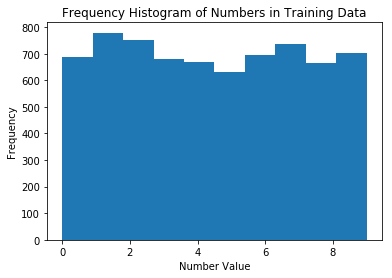

In [34]:
#Frequency histogram of Numbers in Training Data
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

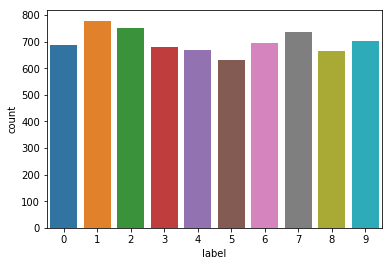

In [35]:
#We can check whether the training data-set is biased towards certain numbers or not by printing out the value_counts() and/or from the distribution plot of labels.
sns.countplot(train['label'])
plt.show()

In [11]:
#we can just print
print(train['label'].value_counts())

1    779
2    751
7    736
9    701
6    697
0    689
3    682
4    669
8    666
5    630
Name: label, dtype: int64


In [ ]:
#We see that selection is little biased towards digit 1 and the sample count for label 1 is around 30% higher than sample 5, and this problem persists even if we use the compete training data-set (42,000 samples). So moving on, it is time to separate label and pixel columns and label is the 1st column of the data-frame.

1    779
2    751
7    736
9    701
6    697
0    689
3    682
4    669
8    666
5    630
Name: label, dtype: int64

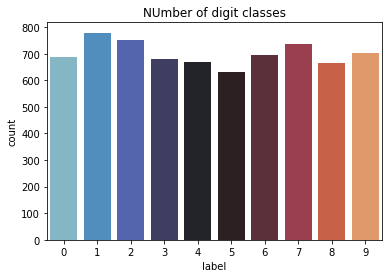

In [12]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train.label.astype('category').value_counts()

Text(0.5,1,'Digit 4')

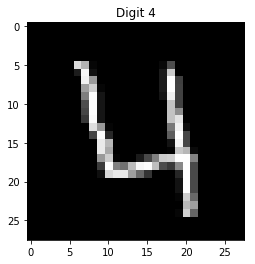

In [13]:
# Plotting some samples as well as converting into matrix

four = train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5,1,'Digit 7')

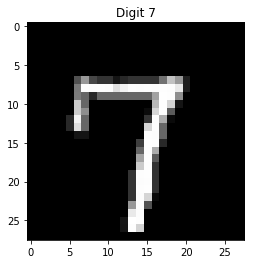

In [14]:
seven = train.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [15]:
#Data Preparation
# average feature values
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.04
pixel762    0.12
pixel763    0.17
pixel764    0.15
pixel765    0.08
pixel766    0.29
pixel767    0.55
pixel768    0.73
pixel769    0.62
pixel770    0.71
pixel771    0.50
pixel772    0.35
pixel773    0.19
pixel774    0.16
pixel775    0.13
pixel776    0.02
pixel777    0.00
pixel778    0.00
pixel779    0.00
pixel780    0.00
pixel781    0.

In [16]:
# splitting into X and y

X = train.iloc[:,1:]
y = train.iloc[:,0]

test = test.iloc[:,:]

In [17]:
#Split Train data into Training and Validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_test = sc_X.transform(test)

In [19]:
#Model Building
#Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)



In [20]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.909047619047619 

[[202   0   0   1   3   2   0   0   1   0]
 [  0 209   1   2   0   1   0   0   0   0]
 [  7   2 207   3   1   1   6   2   3   1]
 [  0   0   8 191   0   6   1   2   2   2]
 [  0   0   3   0 198   0   2   2   0   5]
 [  2   7   2  10   2 159   4   0   3   2]
 [  1   1   1   0   1   8 178   0   2   0]
 [  1   0   1   0   3   0   0 231   1   7]
 [  0   6   2   8   1  10   0   0 150   2]
 [  1   1   5   2  13   1   0   8   2 184]]


In [ ]:
#The linear model gives approx.91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9266666666666666 

[[198   0   4   0   1   0   3   1   2   0]
 [  0 207   0   2   0   1   3   0   0   0]
 [  4   0 216   1   1   0   2   5   3   1]
 [  1   0   8 191   0   5   1   4   2   0]
 [  0   0   2   0 199   0   0   4   0   5]
 [  0   1   2   6   1 168   8   4   1   0]
 [  1   1   5   0   0   2 180   1   2   0]
 [  0   2   5   0   0   0   0 229   1   7]
 [  0   3   2   3   0   5   0   0 166   0]
 [  1   1   2   3   5   0   0  12   1 192]]


In [ ]:
#The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.


In [ ]:
#Grid Search: Hyperparameter Tuning
#Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [44]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.001, 0.1, 100, 10e5],
                     'C': [10,1,0.1,0.01]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 132.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.001, 0.1, 100, 1000000.0], 'C': [10, 1, 0.1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [45]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,14.924053,4.735808,0.931429,0.999133,10,0.001,"{'C': 10, 'gamma': 0.001}",1,0.945918,0.999235,...,0.929592,0.999235,0.925510,0.998724,0.924490,0.999745,0.439299,0.306702,0.007701,0.000382
1,67.499392,8.761916,0.175714,1.000000,10,0.1,"{'C': 10, 'gamma': 0.1}",5,0.169388,1.000000,...,0.175510,1.000000,0.174490,1.000000,0.180612,1.000000,2.281739,0.376496,0.003840,0.000000
2,72.918664,9.431575,0.115510,1.000000,10,100,"{'C': 10, 'gamma': 100}",7,0.137755,1.000000,...,0.104082,1.000000,0.114286,1.000000,0.120408,1.000000,1.622739,1.194915,0.013122,0.000000
3,69.434403,8.815060,0.115510,1.000000,10,1e+06,"{'C': 10, 'gamma': 1000000.0}",7,0.137755,1.000000,...,0.104082,1.000000,0.114286,1.000000,0.120408,1.000000,0.968988,0.552679,0.013122,0.000000
4,16.624807,4.680793,0.920204,0.972602,1,0.001,"{'C': 1, 'gamma': 0.001}",2,0.936735,0.970918,...,0.917347,0.973724,0.920408,0.971429,0.917347,0.974490,0.630452,0.208855,0.009067,0.001346
5,64.226051,7.962221,0.171837,1.000000,1,0.1,"{'C': 1, 'gamma': 0.1}",6,0.167347,1.000000,...,0.171429,1.000000,0.167347,1.000000,0.175510,1.000000,3.815927,0.323744,0.004162,0.000000
6,68.561379,9.276784,0.115510,1.000000,1,100,"{'C': 1, 'gamma': 100}",7,0.137755,1.000000,...,0.104082,1.000000,0.114286,1.000000,0.120408,1.000000,2.563750,0.541156,0.013122,0.000000
7,72.618227,10.300426,0.115510,1.000000,1,1e+06,"{'C': 1, 'gamma': 1000000.0}",7,0.137755,1.000000,...,0.104082,1.000000,0.114286,1.000000,0.120408,1.000000,3.903519,1.439632,0.013122,0.000000
8,34.884037,6.712694,0.842041,0.863316,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",3,0.868367,0.855867,...,0.839796,0.866071,0.846939,0.862500,0.829592,0.867602,2.203368,0.339285,0.015168,0.004089
9,64.509869,8.143295,0.115510,0.115510,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",7,0.137755,0.109949,...,0.104082,0.118367,0.114286,0.115816,0.120408,0.114286,4.220646,0.550463,0.013122,0.003280


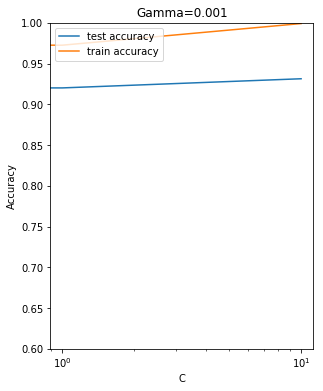

In [48]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')





In [49]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9314285714285714 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [35]:
#Building and Evaluating the Model
# model with optimal hyperparameters

# model
from sklearn.metrics import accuracy_score
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print('\nPredicted Values: ',y_pred)


accuracy 0.9385714285714286 

[[200   0   4   1   1   0   3   0   0   0]
 [  0 208   1   1   0   1   2   0   0   0]
 [  6   0 218   1   1   0   1   2   3   1]
 [  0   0   7 199   0   1   1   2   1   1]
 [  0   0   3   0 201   0   1   3   0   2]
 [  0   2   3   4   1 172   7   1   1   0]
 [  2   1   4   0   2   2 180   0   1   0]
 [  0   2   4   1   2   0   0 230   0   5]
 [  0   1   2   4   1   3   0   0 168   0]
 [  2   1   3   1   4   1   0   9   1 195]] 


Predicted Values:  [9 8 8 ... 4 4 8]


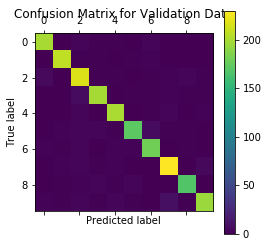

In [15]:
#Plot the Confusion Matrix with matplotlib.pyplot
plt.matshow(metrics.confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Approx.94% accuracy is obtained with 7000 samples and we expect this score to increase  with the complete 42,000 samples.

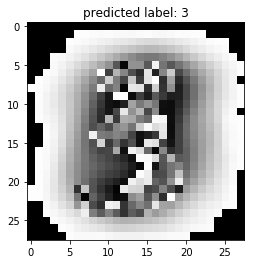

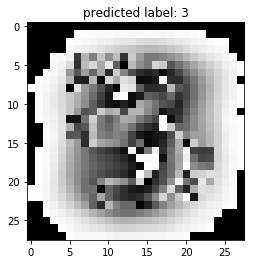

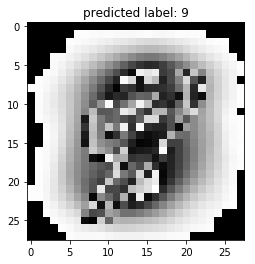

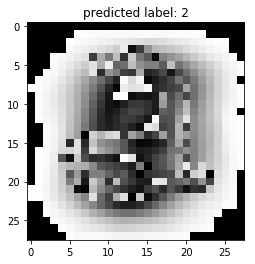

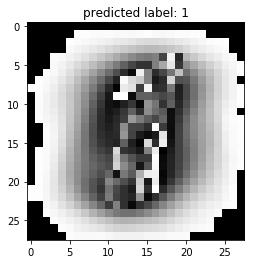

In [16]:
#We can now plot the digits using python matplotlib pyplot imshow . We use the prediction list and the pixel values from the test list for comparison.
for i in (np.random.randint(1,400,5)):
 two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

In [36]:
#To know how many digits were misclassified we can print out the Confusion-Matrix
print( "confusion matrix: \n ", confusion_matrix(y_test, y_pred))

confusion matrix: 
  [[200   0   4   1   1   0   3   0   0   0]
 [  0 208   1   1   0   1   2   0   0   0]
 [  6   0 218   1   1   0   1   2   3   1]
 [  0   0   7 199   0   1   1   2   1   1]
 [  0   0   3   0 201   0   1   3   0   2]
 [  0   2   3   4   1 172   7   1   1   0]
 [  2   1   4   0   2   2 180   0   1   0]
 [  0   2   4   1   2   0   0 230   0   5]
 [  0   1   2   4   1   3   0   0 168   0]
 [  2   1   3   1   4   1   0   9   1 195]]


In [ ]:
#So if we consider the 1st row, we can understand that out of 230 zeros, 200 were correctly classified and so on..

In [37]:
#We can check some of the predictions
print(y_pred[100:105])
print(y_test[100:105])


[5 1 6 1 9]
5506    5
5650    1
5984    6
134     1
4672    9
Name: label, dtype: int64


In [38]:
print(y_pred[0:30])

[9 8 8 7 7 3 3 5 4 4 2 9 4 3 5 1 0 8 0 6 8 8 7 0 8 2 0 4 7 7]


In [39]:
# Test our Model
# Predict for the ' test ' data provided for competition
#Here we've scaled the 'test' data to 'sc_test'
result = model.predict(sc_test)

In [40]:
print(result)

[2 0 9 ... 1 7 3]


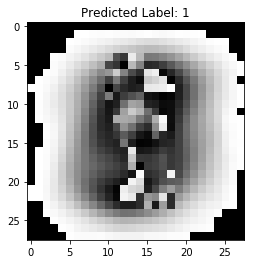

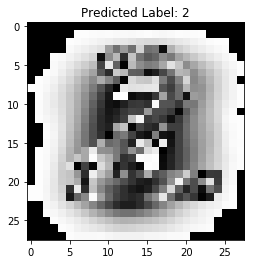

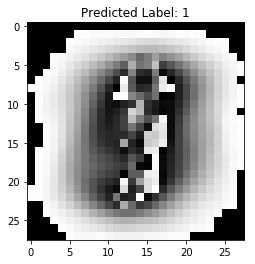

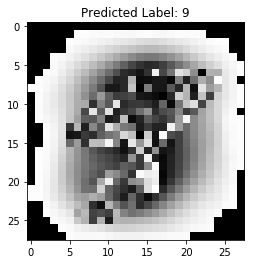

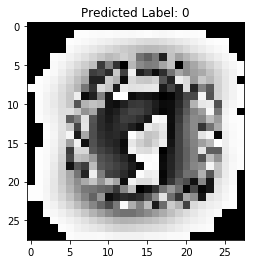

In [42]:
#Visualize some Sample Image Prediction from ' test ' data
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(sc_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [43]:
#Convert Numpy Array to Pandas Series and provide Column names
submission = pd.Series(result,name="Label")

In [44]:
#Concat ' ImageId ' Column with the 'submission' Pandas series
submission = pd.concat([pd.Series(range(1,5001),name = "ImageId"),submission],axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


In [45]:
submission.to_csv("final_submission_v1.csv",index=False)

In [46]:
final_submission = pd.read_csv("final_submission_v1.csv")

In [47]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

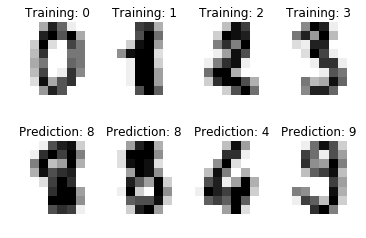

In [23]:
#Recognizing hand-written digits
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()